In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os
import re
import numpy as np
import random

from tqdm import tqdm
import os
import pickle

In [2]:
data_folder = 'data'

In [3]:
train = pd.read_csv(os.path.join(data_folder, 'train.csv'))
train

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...
...,...,...
3995,9cbd5ddba4,NaN
3996,caa039b231,2398 7 2499 11 2600 16 2700 22 2801 26 2901 29...
3997,1306fcee4c,NaN
3998,48d81e93d9,2828 1 2927 3 3026 5 3126 6 3225 8 3324 10 342...


In [4]:
train.head()

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


In [5]:
train_id = os.listdir('train/images')

In [6]:
train_id[:5]

['b3ad13d9e9.png',
 'd514a30db3.png',
 '098c5f3e75.png',
 '5ad4b1d1ff.png',
 '578aefa47e.png']

In [7]:
from IPython.display import Image

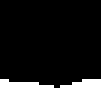

In [8]:
Image(os.path.join('train/masks', train_id[0]))

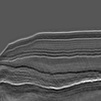

In [9]:
Image(os.path.join('train/images', train_id[0]))

In [10]:
x_train = np.zeros((len(train_id), 128, 128, 1), dtype=np.uint8)

In [11]:
x_train.shape

(4000, 128, 128, 1)

In [12]:
y_train = np.zeros((len(train_id), 128, 128, 1), dtype=np.bool)

In [13]:
y_train.shape

(4000, 128, 128, 1)

In [14]:
from tqdm import tqdm_notebook

In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [16]:
from skimage.transform import resize

In [17]:
for n, id_ in tqdm_notebook(enumerate(train_id), total=len(train_id)):
    img = load_img(os.path.join('train/images', id_))
    img = img_to_array(img)[:,:,1]
    x_train[n]=resize(img, (128, 128, 1), mode='constant', preserve_range=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [18]:
from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from skimage.transform import resize


for n,filename in tqdm_notebook(enumerate(train_id),total=len(train_id)):
    img = load_img("train/images/"+filename)
    img = img_to_array(img)[:,:,0] #숫자 세개중에 아무거나 하나
    x_train[n] = resize(img, (128,128,1),mode="constant", preserve_range=True) #segmentation 에서 size 조정할때 이거 두개 옵션이 들어간다. 
    
    mask = load_img("train/masks/"+filename)
    mask = img_to_array(mask)[:,:,0]
    y_train[n] = resize(mask,(128,128,1),mode="constant", preserve_range=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [19]:
img = load_img("train/images/"+filename)
img = img_to_array(img)
img.shape